# Introduction: Spotify Song Genre Classification

## Problem Description:
This Python notebook presents a comprehensive solution for automating the loan approval process using machine learning techniques. The notebook employs a dataset containing historical loan data to train and evaluate a predictive model, aiming to streamline the decision-making process for loan approval.

# Data description
The data is provided by [Spotify](https://www.kaggle.com/datasets/thedevastator/spotify-tracks-genre-dataset/data)

## Data Exploration & pre-processing: 
The notebook begins with a thorough exploration of the dataset, identifying key features and potential challenges. It covers data cleaning, handling missing values, and encoding categorical variables to prepare the data for model training.



## Baseline columns
| Column Name       | Description                                                                                                      | Data Type  |
|-------------------|------------------------------------------------------------------------------------------------------------------|------------|
| artists           | The name(s) of the artist(s) associated with the track.                                                           | String     |
| album_name        | The name of the album that the track belongs to.                                                                  | String     |
| track_name        | The name of the track.                                                                                            | String     |
| popularity        | The popularity score of the track on Spotify, ranging from 0 to 100.                                              | Integer    |
| duration_ms       | The duration of the track in milliseconds.                                                                       | Integer    |
| explicit          | A boolean value indicating whether the track contains explicit content.                                          | Boolean    |
| danceability      | A score ranging from 0 to 1 that represents how suitable a track is for dancing based on various musical elements. | Float      |
| energy            | A measure of the intensity and activity of a track, ranging from 0 to 1.                                           | Float      |
| key               | The key of the track represented by an integer value.                                                             | Integer    |
| loudness          | The loudness of the track in decibels (dB).                                                                       | Float      |
| mode              | The tonal mode of the track, represented by an integer value (0 for minor, 1 for major).                           | Integer    |
| speechiness       | A score ranging from 0 to 1 that represents the presence of spoken words in a track.                               | Float      |
| acousticness      | A score ranging from 0 to 1 that represents the extent to which a track possesses an acoustic quality.            | Float      |
| instrumentalness  | A score ranging from 0 to 1 that represents the likelihood of a track being instrumental.                         | Float      |
| liveness          | A score ranging from 0 to 1 that represents the presence of an audience during the recording or performance.     | Float      |
| valence           | A score ranging from 0 to 1 that represents the musical positiveness conveyed by a track.                         | Float      |
| tempo             | The tempo of the track in beats per minute (BPM).                                                                 | Float      |
| time_signature    | The number of beats within each bar of the track.                                                                 | Integer    |
| track_genre       | The genre of the track.                                                                                          | String     |


In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold


In [222]:
df = pd.read_csv('./data/spotify-data.csv')
print("Columns:", df.columns.values)

# Dropping unnecessary columns
df.drop(['0', 'track_id'], axis=1, inplace=True)
# ??
df.dropna(inplace=True)

print("shape", df.shape)
print(df.describe())

# Preprocessing artists column
df['artists'] = df['artists'].apply(lambda x: x.split(';'))

Columns: ['0' 'track_id' 'artists' 'album_name' 'track_name' 'popularity'
 'duration_ms' 'explicit' 'danceability' 'energy' 'key' 'loudness' 'mode'
 'speechiness' 'acousticness' 'instrumentalness' 'liveness' 'valence'
 'tempo' 'time_signature' 'track_genre']
shape (113999, 19)
          popularity   duration_ms   danceability         energy  \
count  113999.000000  1.139990e+05  113999.000000  113999.000000   
mean       33.238827  2.280312e+05       0.566801       0.641383   
std        22.304959  1.072961e+05       0.173543       0.251530   
min         0.000000  8.586000e+03       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  113999.000000  113999.000000  113

## Exploratory Data Analysis (EDA): 
Here we will provide insights into the distribution of key variables, relationships between features, and an understanding of the data patterns. Visualizations aid in uncovering trends that contribute to the decision-making process.

Feature Engineering: The notebook implements feature engineering techniques to enhance the predictive power of the model. This involves creating new features, transforming existing ones, and selecting relevant variables to improve the model's ability to capture underlying patterns.

Model Selection: Multiple machine learning algorithms are explored for Spotify Genre prediction, including but not limited to ?? 
logistic regression, decision trees, random forests, and support vector machines. The notebook includes a comparative analysis of their performance metrics, helping users choose the most suitable model for their specific use case.

Model Training and Evaluation: The selected model is trained on the preprocessed dataset, and its performance is evaluated using various metrics such as accuracy, precision, recall, and F1 score. The notebook emphasizes the importance of choosing an evaluation metric that aligns with the business goals of the loan approval system.

Hyperparameter Tuning: To optimize the model's performance, the notebook incorporates hyperparameter tuning techniques, fine-tuning the model for better accuracy and robustness.

Deployment Considerations: The notebook concludes with a discussion on deploying the trained model into a production environment. It provides insights into model deployment options, considerations for scalability, and integration with existing loan approval systems.

By leveraging this Python notebook, users can seamlessly integrate an automated loan approval prediction model into their financial systems, significantly enhancing efficiency and reducing the time and resources required for manual decision-making.


In [223]:
genres = df['track_genre'].value_counts()

# We can see that almost all the genres have at lease 999 songs and at most 1000 songs, which means there is no imbalance in the dataset.
print(min(genres.values))
print(max(genres.values))


# Check for null values in all columns
df.isna().sum()

999
1000


artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

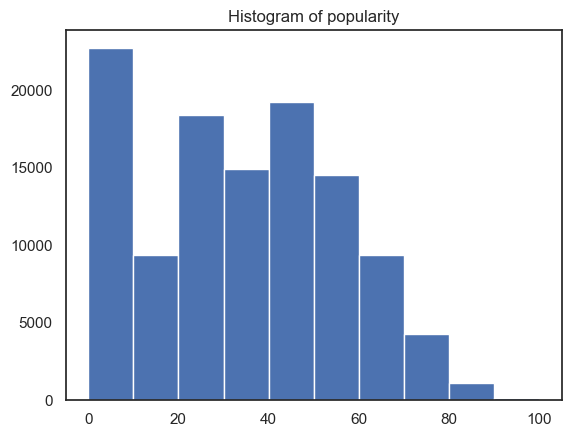

count    113999.000000
mean         33.238827
std          22.304959
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64


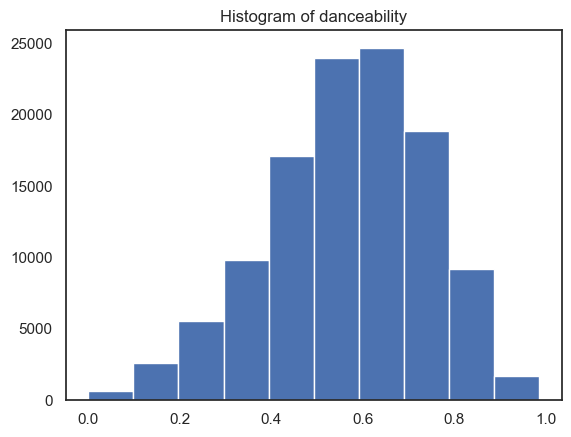

count    113999.000000
mean          0.566801
std           0.173543
min           0.000000
25%           0.456000
50%           0.580000
75%           0.695000
max           0.985000
Name: danceability, dtype: float64


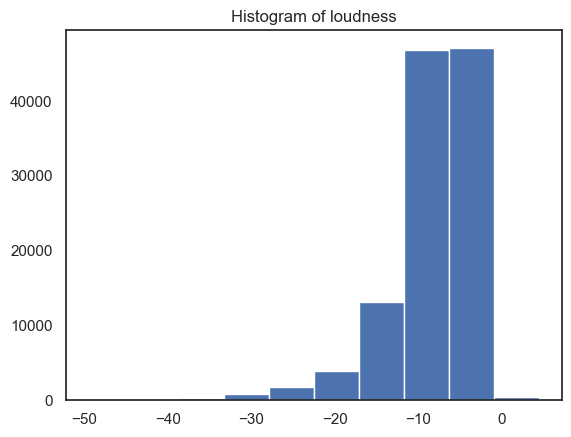

count    113999.000000
mean         -8.258950
std           5.029357
min         -49.531000
25%         -10.013000
50%          -7.004000
75%          -5.003000
max           4.532000
Name: loudness, dtype: float64


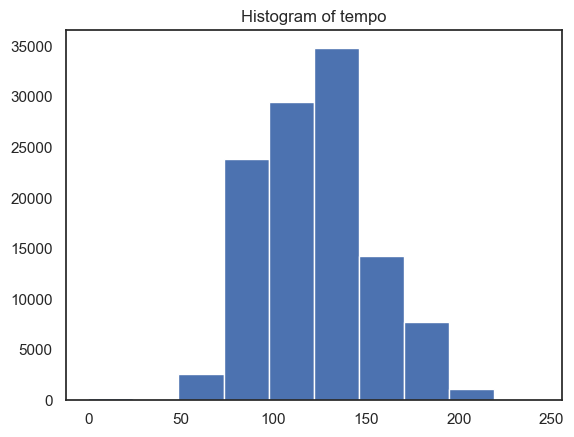

count    113999.000000
mean        122.147695
std          29.978290
min           0.000000
25%          99.218500
50%         122.017000
75%         140.071000
max         243.372000
Name: tempo, dtype: float64


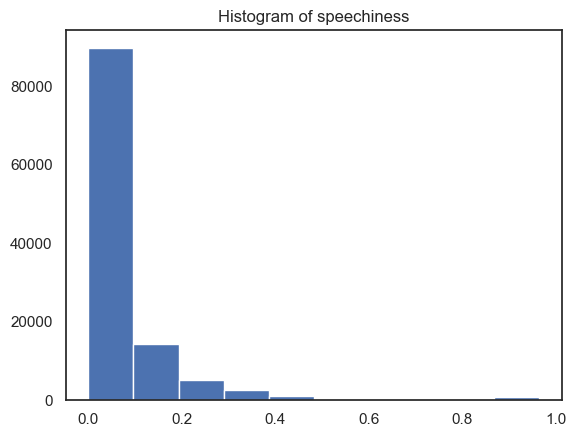

count    113999.000000
mean          0.084652
std           0.105733
min           0.000000
25%           0.035900
50%           0.048900
75%           0.084500
max           0.965000
Name: speechiness, dtype: float64


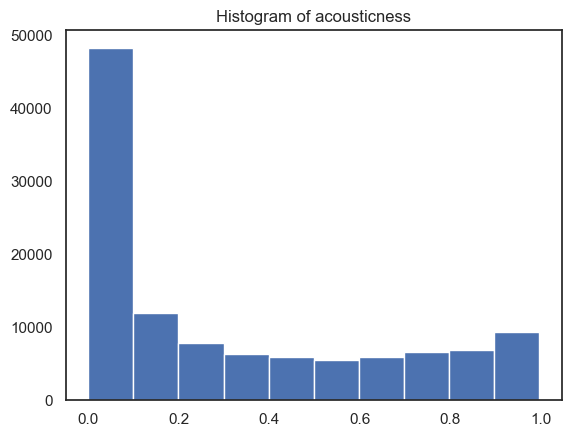

count    113999.000000
mean          0.314907
std           0.332522
min           0.000000
25%           0.016900
50%           0.169000
75%           0.597500
max           0.996000
Name: acousticness, dtype: float64


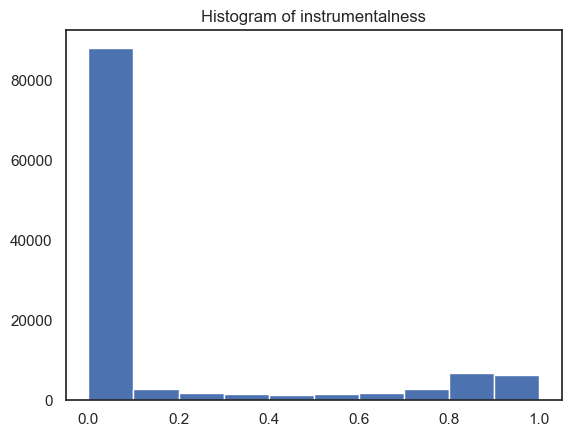

count    113999.000000
mean          0.156051
std           0.309556
min           0.000000
25%           0.000000
50%           0.000042
75%           0.049000
max           1.000000
Name: instrumentalness, dtype: float64


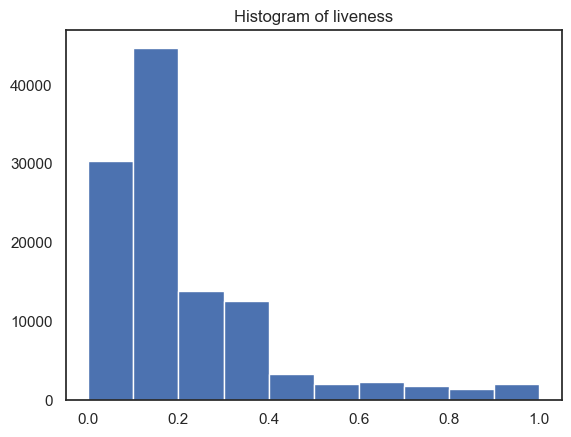

count    113999.000000
mean          0.213554
std           0.190378
min           0.000000
25%           0.098000
50%           0.132000
75%           0.273000
max           1.000000
Name: liveness, dtype: float64


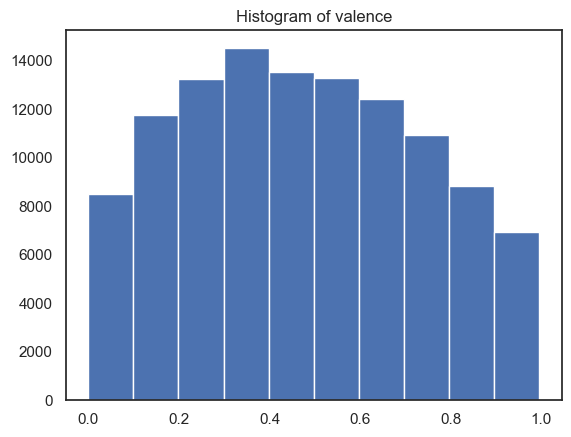

count    113999.000000
mean          0.474066
std           0.259261
min           0.000000
25%           0.260000
50%           0.464000
75%           0.683000
max           0.995000
Name: valence, dtype: float64


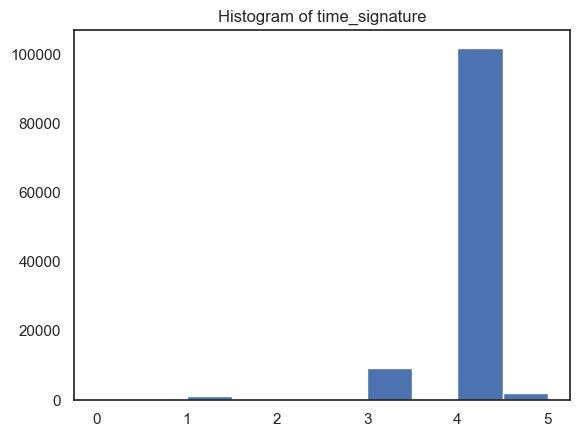

count    113999.000000
mean          3.904034
std           0.432623
min           0.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: time_signature, dtype: float64


In [224]:
numerical_columns = ['popularity', 'danceability', 'loudness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'time_signature']
categorical_columns = ['track_genre', 'explicit', 'mode']
for col in numerical_columns:
    column_data = df[col]
    _, ax = plt.subplots()
    ax.set_title(f'Histogram of {col}')
    
    plt.hist(column_data)
    plt.show()
    print(column_data.describe())


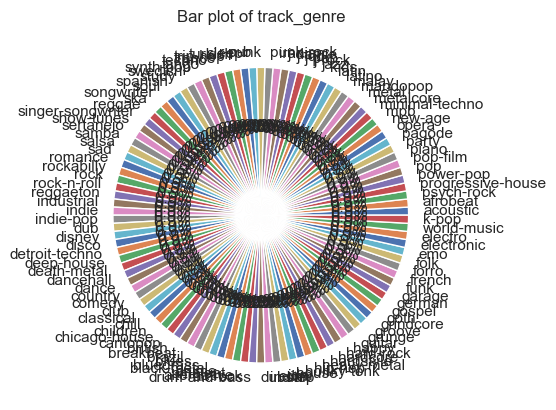

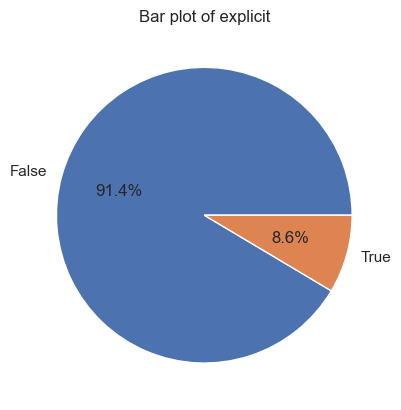

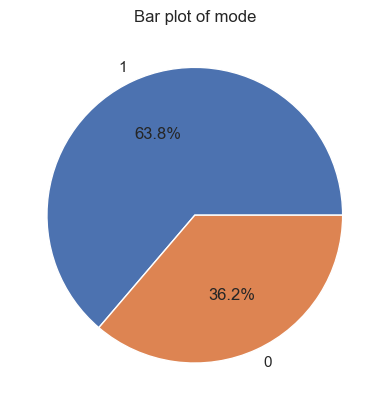

In [225]:
for col in categorical_columns:
    column_data = df[col]
    fig, ax = plt.subplots()
    ax.set_title(f'Bar plot of {col}')
    ax.pie(column_data.value_counts(), labels=column_data.value_counts().index, autopct='%1.1f%%')
    plt.show()

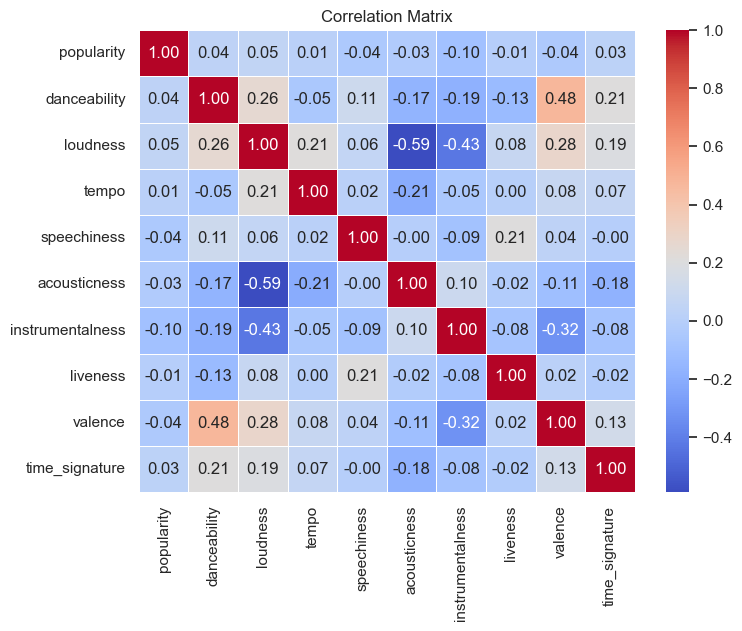

In [226]:
correlation_matrix = df[numerical_columns].corr()

# Use seaborn for a more visually appealing heatmap
sns.set(style="white")

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [227]:
# Doing one hot encoding before splitting the data to avoid getting 
# different number of columns in train and test data
df = pd.get_dummies(df, columns=['track_genre'], prefix=['track_genre'])

In [228]:
train, test = train_test_split(df, test_size=0.2)

## Feature selection & engineering

In [229]:
# Dropping constant values and features with low variance
selector = VarianceThreshold(0.015)
print(df[numerical_columns].var())
selector.fit(df[numerical_columns])
dropped_columns = []
for index, col in enumerate(numerical_columns):
    if(not selector.get_support()[index]):
        dropped_columns.append(col)

print("Columns to be dropped:", dropped_columns)

df.drop(dropped_columns, axis=1, inplace=True)
# There are not variables with high correlation in the dataset to be dropped

popularity          497.511199
danceability          0.030117
loudness             25.294436
tempo               898.697860
speechiness           0.011179
acousticness          0.110571
instrumentalness      0.095825
liveness              0.036244
valence               0.067216
time_signature        0.187162
dtype: float64
Columns to be dropped: ['speechiness']
